In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

import os
import numpy as np
import seaborn as sns

plt.subplots_adjust(hspace=0.5)
plt.rcParams.update({'font.size': 13})

<Figure size 432x288 with 0 Axes>

In [29]:
csv_path1 = '/home/elliot/Documents/CVPR_2020/BFA_defense_camera_ready/BFA/save/2020-05-07/imagenet_mobilenet_v2_quan_BFA_random/attack_profile_891.csv'
csv_path2 = '/home/elliot/Documents/CVPR_2020/BFA_defense_camera_ready/BFA/save/2020-05-08/imagenet_mobilenet_v2_quan_BFA/attack_profile_8633.csv'

df1 = pd.read_csv(csv_path1, index_col=False)
df2 = pd.read_csv(csv_path2, index_col=False)

In [30]:
print(df2)

module idx  bit-flip idx          module name     weight idx  \
0           9             0  features.1.conv.0.0      [6 0 2 0]   
1           9             1  features.1.conv.0.0      [6 0 2 0]   
2          17             2  features.2.conv.0.0  [93 14  0  0]   

   weight before attack  weight after attack  validation accuracy  \
0                  -1.0                127.0               71.138   
1                  -1.0                127.0                0.258   
2                  21.0               -107.0                0.130   

   accuracy drop  trial seed  
0         70.880        8633  
1         70.880        8633  
2          0.128        8633  


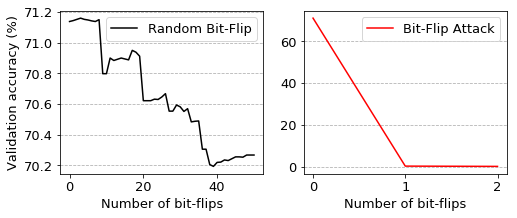

In [47]:
# fig, ax = plt.subplots(figsize=(6,2))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

sns.lineplot(x='bit-flip idx', y='validation accuracy', data=df1, label='Random Bit-Flip',color="black", ax=ax[0])

plt.grid(True, 'major', 'y', ls='--', lw=0.8, c='k', alpha=.3)
plt.ylabel('')
plt.xlabel('number of bit-flips')

sns.lineplot(x='bit-flip idx', y='validation accuracy', data=df2, label='Bit-Flip Attack', color="red", ax=ax[1])

for ax_i in ax.flat:
    ax_i.grid(True, 'major', 'y', ls='--', lw=0.8, c='k', alpha=.3)


ax[0].set(xlabel='Number of bit-flips', ylabel='Validation accuracy (%)')
ax[1].set(xlabel='Number of bit-flips', ylabel='')
ax[1].set_xticks([0,1,2])

# plt.grid(True, 'major', 'y', ls='--', lw=0.8, c='k', alpha=.3)
# plt.ylabel('')
# plt.xlabel('number of bit-flips')

# plt.show()

plt.savefig('./BFA_vs_random.pdf', bbox_inches="tight")

In [25]:
import torch
def int2bin(input, num_bits):
    '''
    convert the signed integer value into unsigned integer (2's complement equivalently).
    '''
    output = input.clone()
    output[input.lt(0)] = 2**num_bits + output[input.lt(0)]
    return output

input = torch.Tensor([-1])
int2bin(input,1)

tensor([1.])